In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('Orgeval.csv', sep = ';')
print(df)

         Date     Heure  Magnesium  Potassium   Calcium   Sodium  Strontium  \
0    28/03/16  17:20:00     8.7817     5.2416  119.7268  13.6809     0.3836   
1    28/03/16  17:20:00     8.7817     5.2416  119.7268  13.6809     0.3836   
2    28/03/16  18:00:00     8.7663     5.2803  119.5939  13.6615     0.3847   
3    28/03/16  18:00:00     8.7663     5.2803  119.5939  13.6615     0.3847   
4    28/03/16  18:40:00     8.7665     5.2762  119.5591  13.6626     0.3844   
..        ...       ...        ...        ...       ...      ...        ...   
198  06/04/16  08:34:00     9.3384     2.7089  121.4828  12.1977     0.3881   
199  06/04/16  09:48:00     9.3303     2.7018  121.2174  12.1862     0.3832   
200  06/04/16  10:28:00     9.3301     2.7019  121.2041  12.2013     0.3814   
201  06/04/16  11:08:00     9.3536     2.7122  121.2581  12.2599     0.3821   
202  06/04/16  11:48:00     9.3748     2.7439  121.2357  12.2899     0.3822   

     Fluorures  Sulfates  Nitrates  Chlorures  Phos

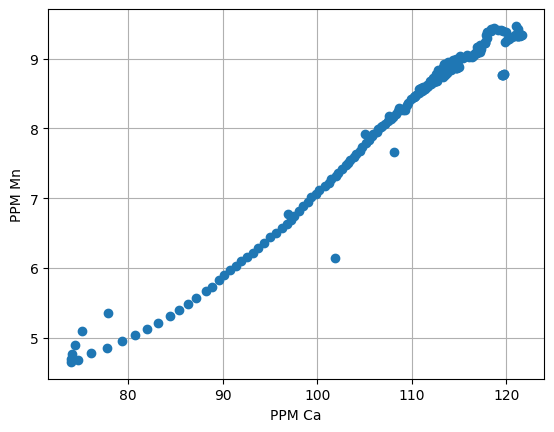

In [5]:
# plot Ca et Mn
Ca_ppm = df['Calcium'].to_numpy()
Mn_ppm = df['Magnesium'].to_numpy()

plt.plot(Ca_ppm, Mn_ppm,'o')
plt.xlabel('PPM Ca')
plt.ylabel('PPM Mn')
plt.grid()

In [92]:
# alternative serach without using np.where
def get_min_2d(a, b, input_matrix):
    matrice_b = b
    matrice_a = a
    for i in range(len(a) - 1):
        matrice_b = np.vstack((matrice_b, b))
    for i in range(len(b) - 1):
        matrice_a = np.vstack((matrice_a,a))
    matrice_a = np.transpose(matrice_a)

    a_min = matrice_a[input_matrix==np.min(input_matrix)]
    b_min = matrice_b[input_matrix==np.min(input_matrix)]

    return a_min[0], b_min[0]

In [126]:
# exploration des paramètres, la relation parait racine carrée
def calculate_best_residual_linear(x,y):
    a = np.arange(0,0.5,0.001)
    b = np.arange(-5,5,0.001)

    residuals = np.zeros((len(a), len(b)))*np.nan

    for i in range(len(a)):
        for j in range(len(b)):
            y_model = a[i]*x + b[j]
            residuals[i,j] = np.sum((y-y_model)**2)  

    extensions = [b[0], b[-1], a[-1], a[0]]

    # alternative serach without np.where
    a_min, b_min = get_min_2d(a,b,residuals)

    print(a_min, b_min)
    
    plt.figure(figsize=(8,8))
    plt.contourf(np.flipud(residuals), 50, extent=extensions)
    plt.contour(np.flipud(residuals), 50, extent=extensions, cmap='gray_r')
    plt.plot(b_min, a_min, '*w', markersize = 10)
    plt.imshow(residuals, aspect='auto', extent=extensions, cmap='turbo')
    plt.colorbar()
    plt.show()

    return a_min, b_min

Valeur de a, valeur de b : 0.10902166956431948 -3.6858800358208335


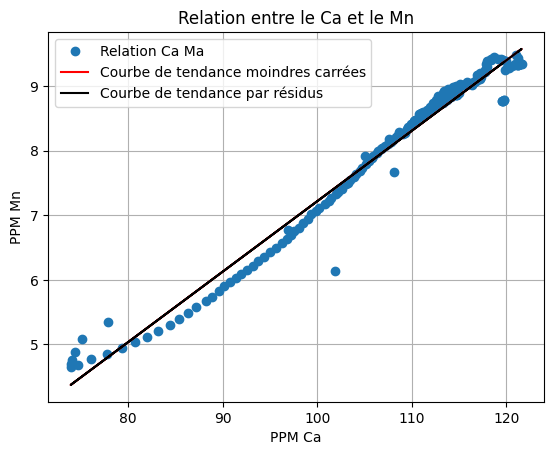

In [67]:
# faire la relation entre le calcium et le magnesium
def moindres_carrées_vectorisé(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    a = (np.sum(x*y - x*y_mean)) / (np.sum(x**2 - x_mean*x))
    b = y_mean - a*x_mean
    print('Valeur de a, valeur de b : ' + str(a) + ' ' + str(b))
    return [a*xi + b for xi in x]

# plot linear residual calculation
linear_res_a, linear_res_b = calculate_best_residual_linear(Ca_ppm, Mn_ppm)
linear_relation = [linear_res_a*ci + linear_res_b for ci in Ca_ppm]

relation_ca_mn = moindres_carrées_vectorisé(Ca_ppm, Mn_ppm)

plt.plot(Ca_ppm, Mn_ppm,'o', label='Relation Ca Ma')
plt.plot(Ca_ppm, relation_ca_mn, 'r', label='Courbe de tendance moindres carrées')
plt.plot(Ca_ppm, linear_relation, 'black', label='Courbe de tendance par résidus')
plt.title('Relation entre le Ca et le Mn')
plt.xlabel('PPM Ca')
plt.ylabel('PPM Mn')
plt.legend()
plt.grid()

In [8]:
# Problème du cone

# r, dr, temp = np.loadtext('cone.txt', skiprows = 1, unpack = True)

df_cone = pd.read_table('cone.txt', sep = ',')
print(df_cone)
print(df_cone.columns)

           r(mm)      dr(mm)   time(s)
0     208.375945   22.045370     600.0
1     236.163320   28.953775    1200.0
2     289.608410   27.986477    3000.0
3     327.950159   27.094773    4800.0
4     365.165335   31.932610    6600.0
..           ...         ...       ...
105  1734.519337   91.373889  392000.0
106  1737.028459   86.461290  399200.0
107  1776.226385  100.816143  406400.0
108  1778.723324  100.075450  413600.0
109  1807.792738   94.479409  420800.0

[110 rows x 3 columns]
Index(['r(mm)', 'dr(mm)', 'time(s)'], dtype='object')


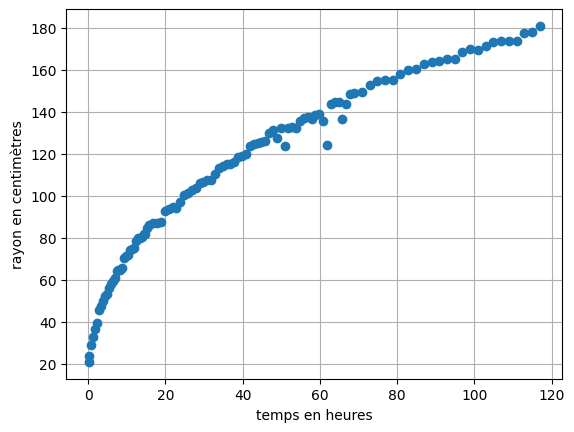

In [85]:
temps = df_cone['time(s)'].to_numpy()
rayon = df_cone['r(mm)'].to_numpy()

temps = temps/60/60
rayon = rayon/10

plt.plot(temps, rayon,'o')
plt.xlabel('temps en heures')
plt.ylabel('rayon en centimètres')
plt.grid()

0.363 3.44400000000282


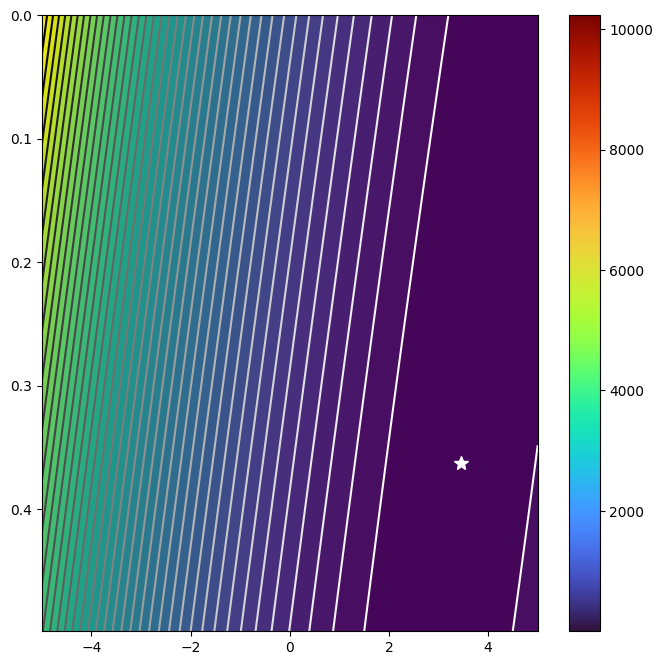

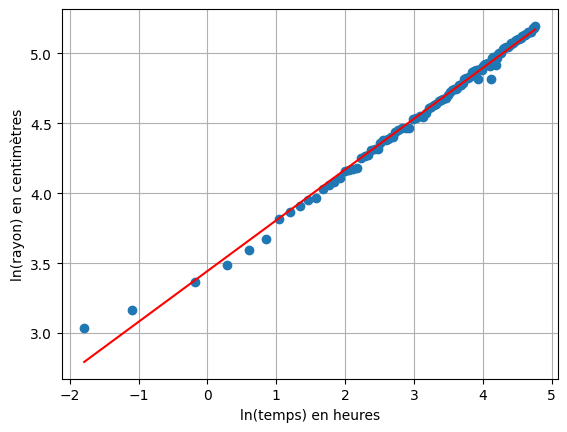

In [127]:
temps = df_cone['time(s)'].to_numpy()
rayon = df_cone['r(mm)'].to_numpy()

temps = temps/60/60
rayon = rayon/10

res_a, res_b = calculate_best_residual_linear(np.log(temps), np.log(rayon))
linear_relation = [res_a*ci + res_b for ci in np.log(temps)]

# plt.plot(temps, rayon,'o')
plt.plot(np.log(temps), np.log(rayon), 'o')
plt.plot(np.log(temps), linear_relation, 'r')
plt.xlabel('ln(temps) en heures')
plt.ylabel('ln(rayon) en centimètres')
plt.grid()

# ln(r) = a*ln(t) + b
# r = (t**a)*exp(b)

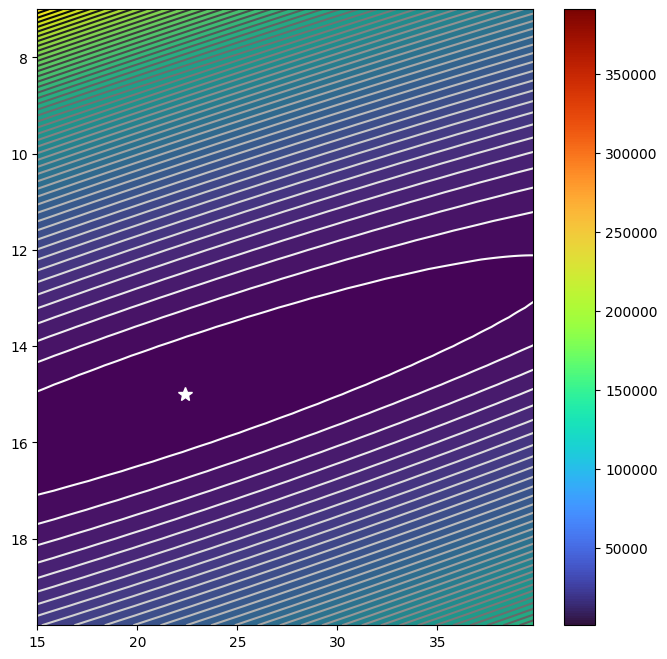

In [68]:
# exploration des paramètres, la relation parait racine carrée
def calculate_best_residual_root(x,y):
    a = np.arange(7,20,0.2)
    b = np.arange(15,40,0.2)

    residuals = np.zeros((len(a), len(b)))*np.nan

    for i in range(len(a)):
        for j in range(len(b)):
            y_model = a[i]*np.sqrt(x) + b[j]
            residuals[i,j] = np.sum((y-y_model)**2)  
    extensions = [b[0], b[-1], a[-1], a[0]]

    a_min, b_min = get_min_2d(a,b,residuals)

    plt.figure(figsize=(8,8))
    plt.contourf(np.flipud(residuals), 50, extent=extensions)
    plt.contour(np.flipud(residuals), 50, extent=extensions, cmap='gray_r')
    plt.plot(
        b_min, 
        a_min,
        '*w', 
        markersize = 10,
    )
    plt.imshow(residuals, aspect='auto', extent=extensions, cmap='turbo')
    plt.colorbar()
    plt.show()

calculate_best_residual_root(temps, rayon)

0.37759999999999805 29.713999999998336


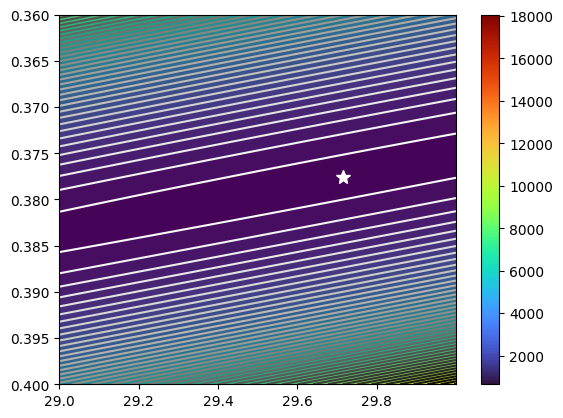

In [107]:
# exploration des paramètres en exponentielle
def calculate_best_residual_loi_puissance(x,y):
    a = np.arange(0.36,0.40,0.0001)
    b = np.arange(29,30,0.0005)

    residuals = np.zeros((len(a), len(b)))*np.nan

    for i in range(len(a)):
        for j in range(len(b)):
            y_model = b[j]*(x**a[i])
            residuals[i,j] = np.sum((y-y_model)**2)  
    extensions = [b[0], b[-1], a[-1], a[0]]

    a_min, b_min = get_min_2d(a,b,residuals)
    print(a_min, b_min)

    plt.contourf(np.flipud(residuals), 50, extent=extensions)
    plt.contour(np.flipud(residuals), 50, extent=extensions, cmap='gray_r')
    plt.plot(
        b_min, 
        a_min, 
        '*w', 
        markersize = 10,
    )
    plt.imshow(residuals, aspect='auto', extent=extensions, cmap='turbo')
    plt.colorbar()
    plt.show()

calculate_best_residual_loi_puissance(temps, rayon)

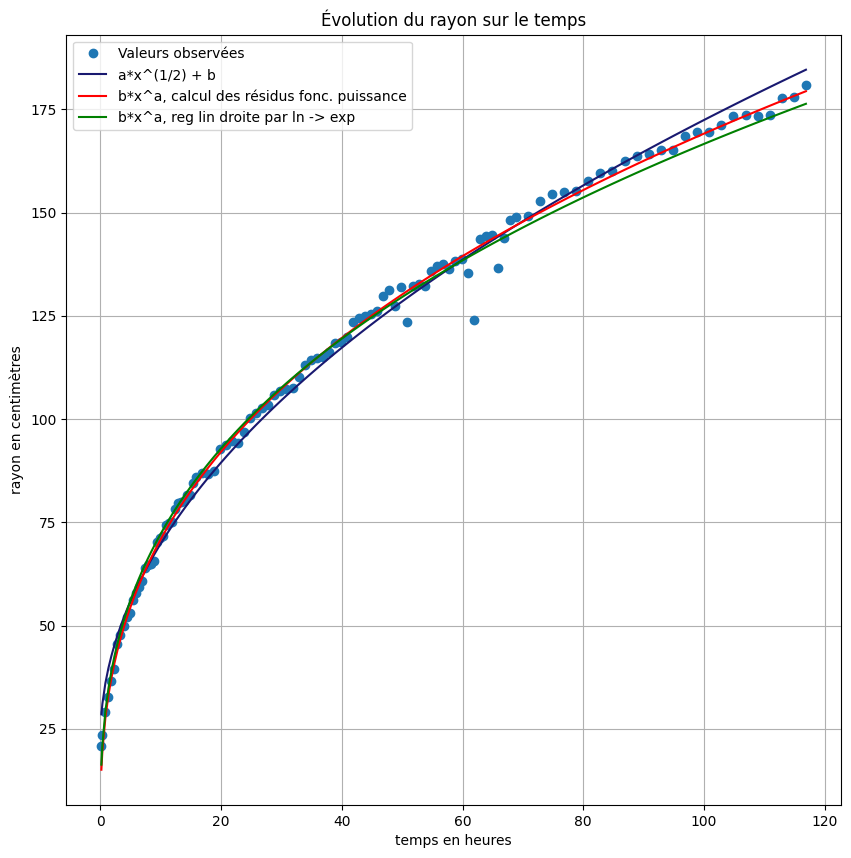

In [132]:
# faire la relation entre le rayon et le temps
def racine(x):
    return 15*np.sqrt(x) + 22.4

def puissance(x):
    return 29.713999999998336*x**0.37759999999999805

def approx_linéaire_de_fonc_piussance(x):
    return np.exp(3.44400000000282)*x**0.363
 
relation1 = racine(temps)
relation2 = puissance(temps)
relation3 = approx_linéaire_de_fonc_piussance(temps)

plt.figure(figsize=(10, 10), dpi=100)
plt.plot(temps, rayon,'o', label='Valeurs observées')
plt.plot(temps, relation1,'midnightblue', label='a*x^(1/2) + b')
plt.plot(temps, relation2, 'red', label='b*x^a, calcul des résidus fonc. puissance')
plt.plot(temps, relation3, 'green', label='b*x^a, reg lin droite par ln -> exp')
plt.xlabel('temps en heures')
plt.ylabel('rayon en centimètres')
plt.title('Évolution du rayon sur le temps')
plt.legend()
plt.grid()

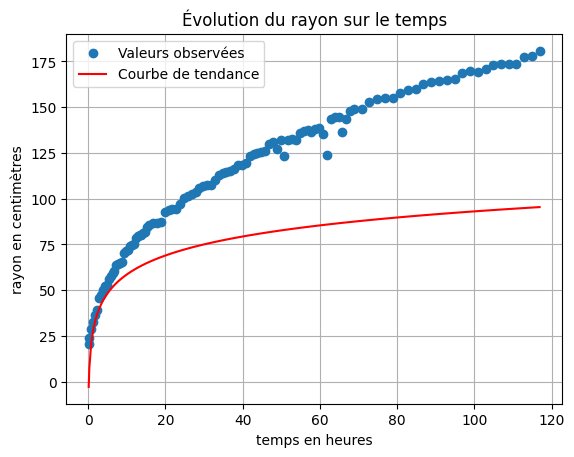

In [13]:
# faire la relation entre le rayon et le temps
def log(x, y):
    return 15*np.log(x) + 24
 
relation = log(temps, rayon)

plt.plot(temps, rayon,'o', label='Valeurs observées')
plt.plot(temps, relation,'r', label='Courbe de tendance')
plt.xlabel('temps en heures')
plt.ylabel('rayon en centimètres')
plt.title('Évolution du rayon sur le temps')
plt.legend()
plt.grid()

In [46]:
x = [1,2,3,4]
x_stacked = np.vstack((x,x))
print(x_stacked)

[[1 2 3 4]
 [1 2 3 4]]
